In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt

In [2]:
[x for x in dir(tf.keras.datasets) if '_' != x[0] ]

['boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [4]:
mnist = tf.keras.datasets.mnist
#https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [10]:
type(train_images)

numpy.ndarray

In [8]:
train_images.shape

(60000, 28, 28)

In [52]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

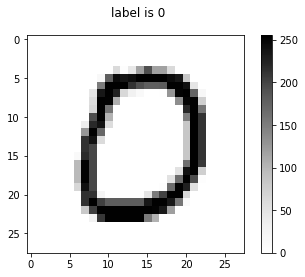

In [64]:
def display_digit(digit, title=''):
    title = str(title)
    title = 'label is {}'.format(title) if len(title)>0 else ''
    plt.imshow(digit, cmap='Greys', interpolation='nearest')#no reshape needed?
    plt.suptitle(title)
    plt.colorbar()
    
def disp_tr_index(index):
    display_digit(train_images[index], train_labels[index])
    
def disp_tst_index(index):
    display_digit(test_images[index], test_labels[index])
#display_digit(train_images[10])
#print(train_labels[10])
disp_tst_index(10)

In [11]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [13]:
height=28
width=28
channels=1
n_inputs = height * width

In [16]:
#settings for first conv layer
conv1_feature_maps=32 #32 feature maps in layer
conv1_kernel_size = 3 #3x3 kernel
conv1_stride=1 #horiz and vert
conv1_pad = "SAME" # 0 pad to consider edges 
# or "VALID" to get no zero pad

In [17]:
#settings for second conv layer
conv2_feature_maps=64 # feature maps in layer
conv2_kernel_size = 3 #3x3 kernel
conv2_stride=2 #bigger stride
conv2_pad = "SAME" # 0 pad to consider edges 
# or "VALID" to get no zero pad

In [18]:
pool3_feature_maps = conv2_feature_maps #same as last conv layer

In [20]:
n_fullyconn1 = 64
n_outputs = 10 #number of possible digit classes

In [49]:
#X = tf.placeholder(tf.float32, shape=[None, n_inputs], name='X')
#y = tf.placeholder(tf.int32, shape=[None], name='y')
#X = tf.compat.v1.placeholder(tf.float32, shape=[None, n_inputs], name='X')# tf.placeholder() is not compatible with eager execution.
#dir(tf)
#example is deprecated need to find newer way
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Input(shape=(None,n_inputs), name='X'))    # keras processing layer - no neurons
#https://www.tensorflow.org/guide/migrate

#X = tf.Variable(dtype=tf.float32, shape=(None, n_inputs), name='X')#ValueError: initial_value must be specified.
#tf.Tensor(shape=(None, n_inputs), dtype=tf.float32)

In [43]:
help(tf.keras.layers.Conv2D)

Help on class Conv2D in module tensorflow.python.keras.layers.convolutional:

class Conv2D(Conv)
 |  Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  2D convolution layer (e.g. spatial convolution over images).
 |  
 |  This layer creates a convolution kernel that is convolved
 |  with the layer input to produce a tensor of
 |  outputs. If `use_bias` is True,
 |  a bias vector is created and added to the outputs. Finally, if
 |  `activation` is not `None`, it is applied to the outputs as well.
 |  
 |  When using this layer as the first layer in a model,
 |  provide the keyword argument `input_shape`
 |  (tuple of integers, does not include the sample axis),
 |  e.g. `input_shape=(128, 128, 3)` for 128x

In [50]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))    # keras processing layer - no neurons


In [51]:
#no need to pass in X yet
#need input as hieght x width x channels
model.add(tf.keras.layers.Conv2D(filters=conv1_feature_maps, kernel_size=conv1_kernel_size,
                      strides=conv1_stride, padding=conv1_pad, 
                      activation=tf.nn.relu, name='conv1'))

ValueError: Input 0 of layer conv1 is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: [None, 784]

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=conv2_feature_maps,
                                 kernel_size=conv2_kernel_size,
                                 strides=conv2_stride, padding=conv2_pad,
                                 activation=tf.nn.relu, name='conv2'))

In [48]:
model.layers

In [46]:
#do this later
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.